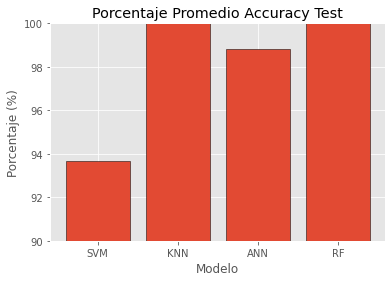

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



plt.style.use('ggplot')
Modelos = ["SVM", "KNN", "ANN", "RF"]
Promedio = [93.67,100,98.82,100]

plt.bar(Modelos,Promedio,edgecolor="black")
plt.title('Porcentaje Promedio Accuracy Test')
plt.ylim(90,100)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Modelo')
plt.show()

In [43]:
data = "C:/Users/peore/Desktop/Ivito/Tesis_SDN/Entrenamientos/dataset_ivo.csv"

In [54]:
dataset = pd.read_csv(data, low_memory=False)

In [55]:
dataset.iloc[:, 1] = dataset.iloc[:, 1].str.replace('.', '')
dataset.iloc[:, 3] = dataset.iloc[:, 3].str.replace('.', '')
dataset.iloc[:, -2] = dataset.iloc[:,-2].str.replace(",","")

X_flow = dataset.iloc[:, :-1].values
X_flow = X_flow.astype('float32')
y_flow = dataset.iloc[:, -1].values

X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.20, random_state=0)

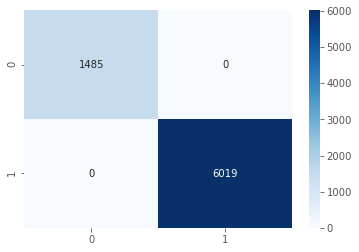

success accuracy = 100.00 %
fail accuracy = 0.00 %
------------------------------------------------------------------------------
 
Classification Report

              precision    recall  f1-score   support

     BENIGNO       1.00      1.00      1.00      1485
     MALIGNO       1.00      1.00      1.00      6019

    accuracy                           1.00      7504
   macro avg       1.00      1.00      1.00      7504
weighted avg       1.00      1.00      1.00      7504



In [56]:
from sklearn.ensemble import RandomForestClassifier

X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow,
                                                                            test_size=0.2)
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
flow_model = classifier.fit(X_flow_train, y_flow_train)
y_flow_pred = flow_model.predict(X_flow_test)
cm = confusion_matrix(y_flow_test, y_flow_pred)

sns.heatmap(cm, annot=True, 
            cmap='Blues', fmt='d')
plt.show()

acc = accuracy_score(y_flow_test, y_flow_pred)

print("success accuracy = {0:.2f} %".format(acc*100))
fail = 1.0 - acc
print("fail accuracy = {0:.2f} %".format(fail*100))
print("------------------------------------------------------------------------------")
print(" ")
print('Classification Report')
target_names = list(['BENIGNO','MALIGNO'])
print('')
print(classification_report(y_flow_test, y_flow_pred, target_names=target_names))

In [75]:
X_flow.columns()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [31]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [83]:
X = dataset.drop(["label"],axis=1)

In [102]:
feat_importances = pd.Series(flow_model.feature_importances_, index=X.columns)

<AxesSubplot:>

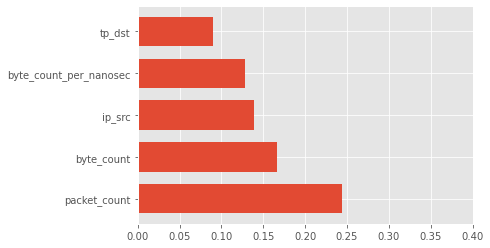

In [135]:
feat_importances = pd.Series(flow_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh',xlim=(0.0,0.4),width=(0.7))

In [156]:
#Los menos importantes:
feat_importances = pd.Series(flow_model.feature_importances_, index=X.columns) < 0.01

Text(0, 0.5, 'Característica')

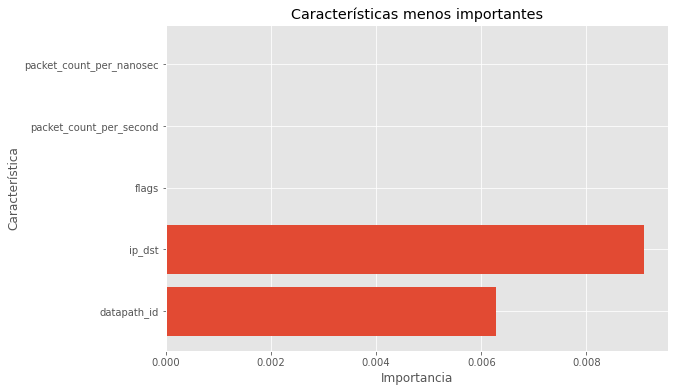

In [164]:
figsize = plt.subplots(figsize = (9, 6))
plt.barh(range(sum(feat_importances)), flow_model.feature_importances_[feat_importances], align = 'center')
plt.yticks(np.arange(sum(feat_importances)), X.columns[feat_importances])
plt.title("Características menos importantes")
plt.xlabel("Importancia")
plt.ylabel("Característica")

In [165]:
Casos = ["Caso1","Caso2","Caso3","Caso4"]
Porcentaje_RF = [100,100,88.49,50.22]
Porcentaje_KNN = [100,100,75.46,50]

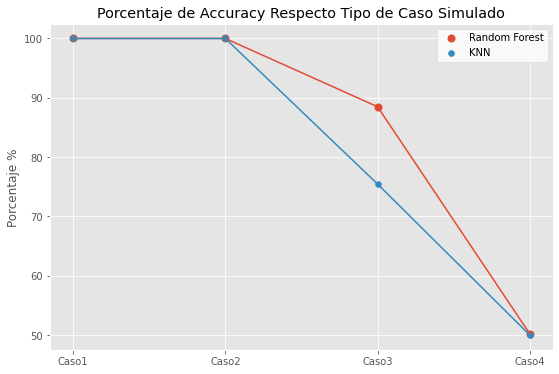

In [183]:
figsize = plt.subplots(figsize = (9, 6))
plt.scatter(Casos, Porcentaje_RF,linewidths=2,label="Random Forest")
plt.scatter(Casos, Porcentaje_KNN,label="KNN")
plt.plot(Casos, Porcentaje_RF)
plt.plot(Casos, Porcentaje_KNN)
plt.title("Porcentaje de Accuracy Respecto Tipo de Caso Simulado")
plt.legend(facecolor="white")
plt.ylabel("Porcentaje %")
plt.show()